Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Data shape: (569, 30)
Target shape: (569,)
K-menas clustering assigned: (array([0, 1], dtype=int32), array([378, 191]))


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


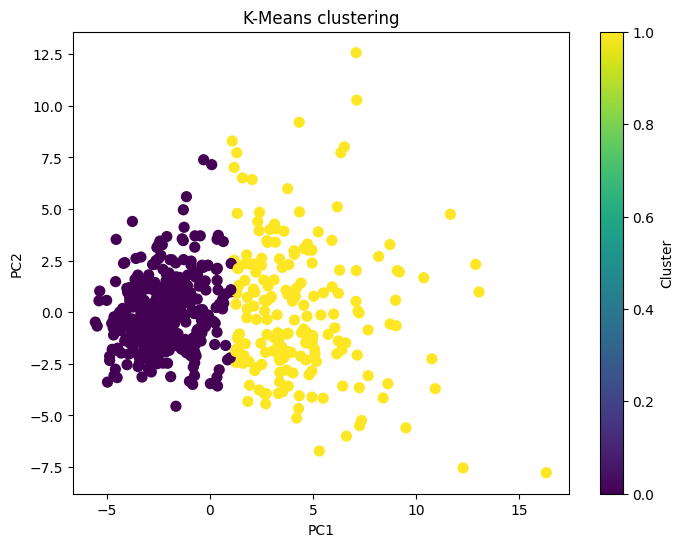

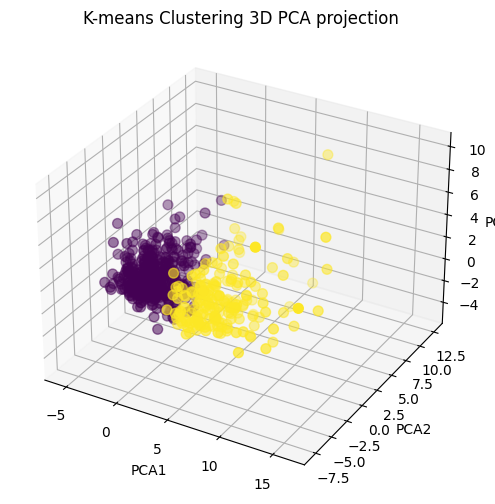

KNN Classification score: 0.9590643274853801


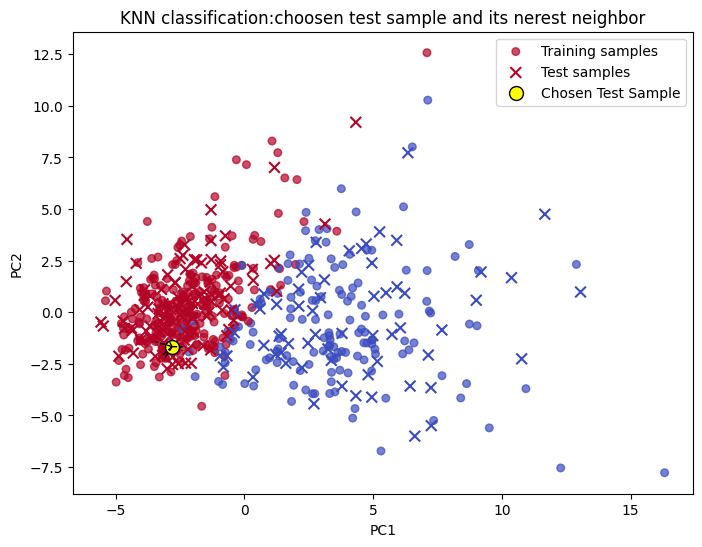

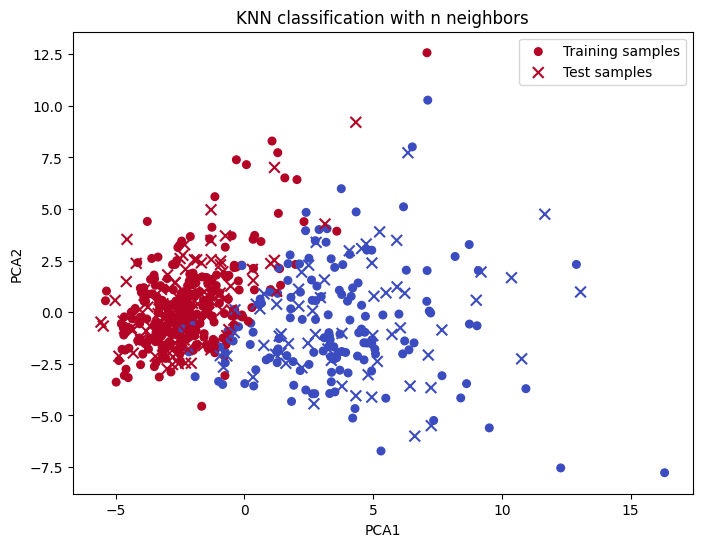

KNN regressor score: 0.9151992808376767


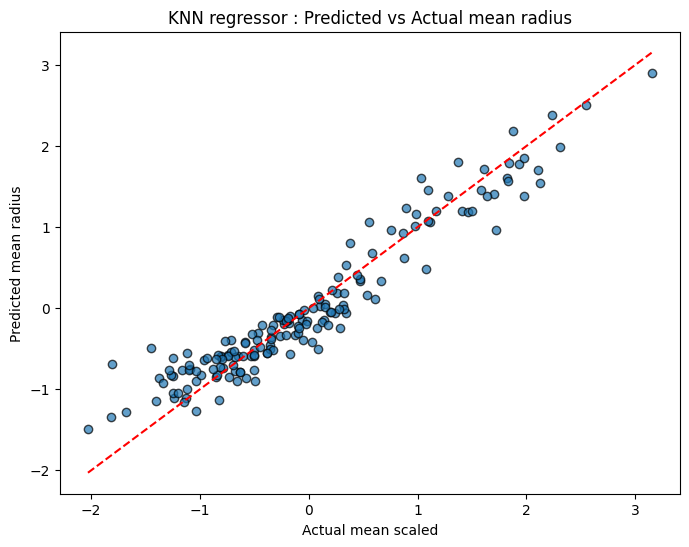

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor


# Input data files are available in the read-only "../input/" directory
# Load and Explore the Dataset
data =load_breast_cancer()
X= data.data
Y=data.target
features_name=data.feature_names

print("Feature names: ", features_name)
print("Target names:", data.target_names)
print("Data shape:",X.shape)
print("Target shape:",Y.shape)

#---------------------
# K-Means Clustering  
#---------------------

# We perform clustering to seperate the data into distinct groups without labels.
# Using PCA for visualization
scaler =StandardScaler()
X_scaled=scaler.fit_transform(X)

#Reduce to 2 components for plotting
pca_2d=PCA(n_components=2)
X_pca_2d= pca_2d.fit_transform(X_scaled)

kmeans= KMeans(n_clusters=2,random_state=42)

clusters= kmeans.fit_predict(X_pca_2d)

print("K-menas clustering assigned:",np.unique(clusters,return_counts=True))

#2D scatter plot for clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0],X_pca_2d[:,1],c=clusters,cmap='viridis',s=50)
plt.title("K-Means clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

#3D plot

pca_3d=PCA(n_components=3)
X_pca_3d=pca_3d.fit_transform(X_scaled)

fig=plt.figure(figsize=(8,6))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(X_pca_3d[:,0],X_pca_3d[:,1],X_pca_3d[:,2],c=clusters,cmap='viridis',s=50)
ax.set_title("K-means Clustering 3D PCA projection")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()


#---------------------------
#K-Neighbors Classification
#---------------------------
# We'll use original labels (y) for classification
# Split into train and test sets
X_train_clf,X_test_clf,Y_train_clf,Y_test_clf=train_test_split(X_scaled,Y,test_size=0.3,random_state=42)
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf,Y_train_clf)
y_predict_clf=knn_clf.predict(X_test_clf)
score_clf=knn_clf.score(X_test_clf,Y_test_clf)
print("KNN Classification score:",score_clf)

#Project test data on PCA used for training visualization
#For plotting neighbors we also transform traning set
X_train_pca=pca_2d.transform(X_train_clf)
X_test_pca=pca_2d.transform(X_test_clf)

#Pick one sample from test set to visualize its neighbors
test_index=10
test_sample = X_test_clf[test_index].reshape(1, -1)
test_sample_pca = X_test_pca[test_index].reshape(1, -1)

distances, indices = knn_clf.kneighbors(test_sample)

#Plot the test and visualize the choosen neighbors
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=Y_train_clf,cmap='coolwarm',s=30,alpha=0.7,label="Training samples")
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=Y_test_clf,cmap='coolwarm',s=60,marker='x',label="Test samples")
plt.scatter(test_sample_pca[0,0],test_sample_pca[0,1],c='yellow',s=100,edgecolors='black', label='Chosen Test Sample')


#Plot lines for the choosen nearest neighbor
for idx in indices[0]:
    neighbor_pca=X_train_pca[idx]
    plt.plot([test_sample_pca[0,0],neighbor_pca[0]],
            [test_sample_pca[0,1],neighbor_pca[1]],'k--',linewidth=1)

plt.title("KNN classification:choosen test sample and its nerest neighbor")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show


#2D scatter plot
X_test_pca=pca_2d.transform(X_test_clf)
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=Y_train_clf,cmap='coolwarm',s=30,label="Training samples")
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=Y_test_clf,cmap='coolwarm',s=60,marker='x',label="Test samples")
plt.title("KNN classification with n neighbors")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


#---------------------
#KNN regression
#---------------------
#Using one feature as target (mean,radius, - feature index 0)
y_reg=X_scaled[:,0]
X_reg=X_scaled[:,1:]

X_train_reg,X_test_reg,Y_train_reg,Y_test_reg=train_test_split(X_reg,y_reg,test_size=0.3,random_state=42)

knn_reg=KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg,Y_train_reg)
y_pred_reg=knn_reg.predict(X_test_reg)
score_reg=knn_reg.score(X_test_reg,Y_test_reg)
print("KNN regressor score:",score_reg)

plt.figure(figsize=(8,6))
plt.scatter(Y_test_reg,y_pred_reg,alpha=0.7,edgecolors='black')
plt.title("KNN regressor : Predicted vs Actual mean radius")
plt.xlabel("Actual mean scaled")
plt.ylabel("Predicted mean radius")
plt.plot([Y_test_reg.min(),Y_test_reg.max()],[Y_test_reg.min(),Y_test_reg.max()],'r--')
plt.show()








# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session